### Supervised K-NN Regression on Cement Manufacturing Data 

In [1]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV

### What dataset will we be using?
We will be working with a civil manufacturing dataset talking about cement production. 
<br></br>
Cement manufacturing is crucial for modern construction and infrastructure development. It provides the essential binding agent used in concrete, which is the primary building material for roads, bridges, buildings, and other structures. Cement production involves transforming raw materials like limestone, clay, and minerals through a complex chemical process, resulting in a durable and versatile material that forms the foundation of urban and industrial growth. The availability of cement supports economic progress by enabling the creation of resilient structures that facilitate commerce, transportation, housing, and overall societal development.
<br></br>
This dataset in particular aims to analyze the concrete compressive strength, measured in MPa (megapascals), for a given mixture. The mixture is a function of age and various ingredients, such as cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.
<br></br>
If you would like to access this dataset from the source, you can find it here: 
https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset

In [2]:
data = pd.read_csv('../data/concrete.csv')
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


Here are some attribute information, provided by the people who collected this data:

- Attribute Information
- Cement : measured in kg in a m3 mixture
- Blast : measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

### Let's get a quick summary rundown of our concrete data! This can be done using the ```.info()``` function. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### What does the above summary tell us about our concrete dataset?
- It contains 8 feature variables, 1 output variable (strength), and 1030 rows.
- There are 8 float64 columns and 1 int64 columns.
- All columns are quantitative, making it suitable for a regression task.
- There are no columns with missing values

In [4]:
X = data[['cement','slag','ash','water']]

y = data['strength']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

Now that we have split our data, let's perform some scaling on our numerical data. Scaling is important because it ensures the columns with larger numerical values do not overpower/dominate the other columns with smaller values when it comes to distance calculations. When we scale our feature variables, we are ensuring that all the features contribute equally, therefore leading to unbiased results and confidence in finding the similar datapoints. 

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

You may be wondering why we are only scaling the X dataset, and not the y (response variable). This is because the response variable is not involved in distance calculations, but rather based off the input variables. 

The way that the algorithm works is that the response/target of the unknown datapoint is estimated based off the averaging/weight average of the response values of the nearest neighbours, and that sense of "nearest" is based off the input feature values of those neighbours. 

Scaling the response variable won't affect the knn calculation process, and could actually introduce unnecessary complexity.  

Building off what was said regarding how the "nearest" point is calculated, let's examine that a bit further!

There are actually different ways how we can calculate the distance between points. Some popular examples include Euclidean, Manhattan, and Hamming distances. The form that we'll be using is the Euclidean distance. 

The Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y). 

The Euclidean distance formula is as follows:

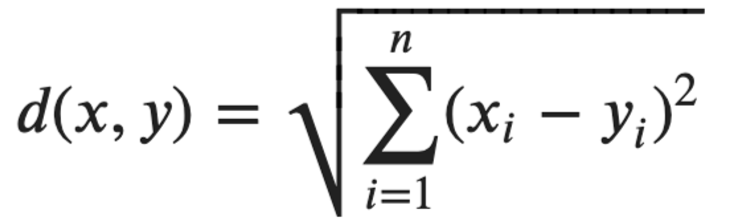
<!-- 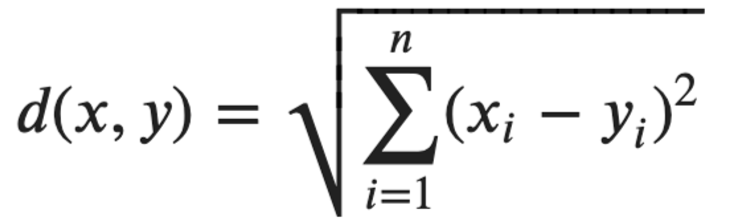 -->

In [7]:
rmse_val = [] #to store rmse values for different k
k_value = 20

for K in range(1, k_value+1):
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k=' , K , 'is:', error, 'with index ' , K-1)


RMSE value for k= 1 is: 17.084954837018028 with index  0
RMSE value for k= 2 is: 14.535796038499859 with index  1
RMSE value for k= 3 is: 13.44512771450161 with index  2
RMSE value for k= 4 is: 13.252602018898697 with index  3
RMSE value for k= 5 is: 12.892959392900325 with index  4
RMSE value for k= 6 is: 12.846067256136475 with index  5
RMSE value for k= 7 is: 12.696522924016229 with index  6
RMSE value for k= 8 is: 12.609205690942323 with index  7
RMSE value for k= 9 is: 12.701957456702813 with index  8
RMSE value for k= 10 is: 12.496903608897586 with index  9
RMSE value for k= 11 is: 12.463124079592045 with index  10
RMSE value for k= 12 is: 12.542764308505044 with index  11
RMSE value for k= 13 is: 12.458735137562131 with index  12
RMSE value for k= 14 is: 12.472461796252494 with index  13
RMSE value for k= 15 is: 12.44148646127398 with index  14
RMSE value for k= 16 is: 12.339560425860073 with index  15
RMSE value for k= 17 is: 12.414304598645636 with index  16
RMSE value for k= 

In [8]:
rmse_val

[17.084954837018028,
 14.535796038499859,
 13.44512771450161,
 13.252602018898697,
 12.892959392900325,
 12.846067256136475,
 12.696522924016229,
 12.609205690942323,
 12.701957456702813,
 12.496903608897586,
 12.463124079592045,
 12.542764308505044,
 12.458735137562131,
 12.472461796252494,
 12.44148646127398,
 12.339560425860073,
 12.414304598645636,
 12.426809438271029,
 12.420925061538469,
 12.439184929187256]

In [9]:
curve = pd.DataFrame(rmse_val) #elbow curve 

curve.index += 1

curve

,0
1,17.084955
2,14.535796
3,13.445128
4,13.252602
5,12.892959
6,12.846067
7,12.696523
8,12.609206
9,12.701957
10,12.496904


<AxesSubplot: title={'center': 'Different Number of Neighbours and their RMSE Value'}, xlabel='K Neighbours', ylabel='RMSE (root mean squared error) value'>

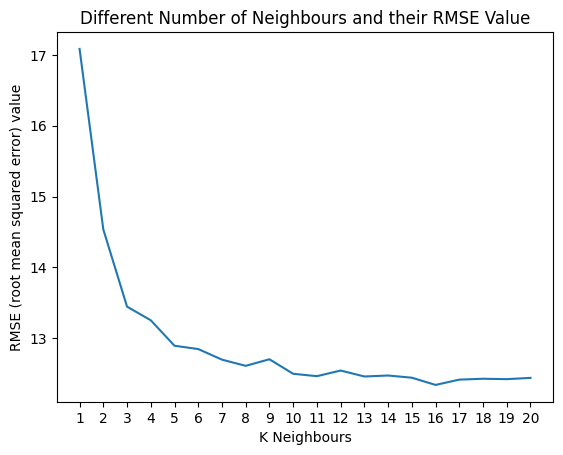

In [10]:
curve.plot(title='Different Number of Neighbours and their RMSE Value',
          xlabel="K Neighbours" , ylabel="RMSE (root mean squared error) value",
          legend=False, 
          xticks=range(1,21))

From our plot, we can see that k=18 would be an ideal value, because it is the lowest value. 

At k=18, the RMSE is approximately 12.370883869534156.

To verify, let's actually run some code and find the index of the minimum value.

In [11]:
# rmse_val.index(min(rmse_val))
(min(rmse_val))


12.339560425860073

### GridSearch CV

Listing out all the k values might seem complex and repetitive, and it's also quite tedious to plot out the elbow curve everytime and try to obtain a value from it. This method always has the possibility of human error when selecting which value to take. 


Another way of determing which k value to use GridSearch CV, which is an algorithm that allows us to find the best parameter value, also known as hyperparameters. 

Hyperparameters are parameters that are set before the learning process and can significantly influence a model's performance.

In GridSearchCV, you specify a grid of possible values for the hyperparameters you want to tune. The algorithm then evaluates all possible combinations of these values using cross-validation, where the dataset is divided into multiple subsets for training and testing. For each combination, the model's performance is measured and compared using a scoring metric.

Once all combinations are tested, GridSearchCV returns the hyperparameter values that produced the best performance on the validation data. This helps automate the process of finding optimal hyperparameters, saving time and reducing the risk of manual selection bias.

GridSearchCV is an essential tool for improving a model's accuracy and generalization by fine-tuning hyperparameters in a systematic manner.

In [12]:
list(range(1,21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [13]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': list(range(1,21))}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 15}

In [14]:
clf = KNeighborsRegressor(n_neighbors = 8)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

12.609205690942323
